In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from keras.utils import np_utils

In [ ]:
from keras.datasets import mnist
(x_Train , y_Train),(x_Test , y_Test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
x_Train4D = x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')  
x_Test4D = x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

x_Train4D_normalize = x_Train4D / 255  
x_Test4D_normalize = x_Test4D / 255

y_TrainOneHot = np_utils.to_categorical(y_Train) 
y_TestOneHot = np_utils.to_categorical(y_Test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
model = Sequential()

In [ ]:
model.add(Conv2D(filters=16,
				 kernel_size=(5,5), 						
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=36,
				 kernel_size=(5,5), 						
                 padding='same',
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Dropout(0.25))

model.add(Flatten())  #建立平坦層，進行攤平
model.add(Dense(128, activation='relu'))   #建立隱藏層
model.add(Dropout(0.5))  #Dropout
model.add(Dense(10, activation='softmax'))  #建立輸出層

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 36)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 36)          0         
                                                                 
 flatten (Flatten)           (None, 1764)              0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

train_history=model.fit(x=x_Train4D_normalize, 		
						  y=y_TrainOneHot,validation_split=0.2,
						  epochs=10, batch_size=300,verbose=2)

Epoch 1/10
160/160 - 9s - loss: 0.5048 - accuracy: 0.8426 - val_loss: 0.0993 - val_accuracy: 0.9716 - 9s/epoch - 54ms/step
Epoch 2/10
160/160 - 1s - loss: 0.1384 - accuracy: 0.9589 - val_loss: 0.0698 - val_accuracy: 0.9787 - 1s/epoch - 7ms/step
Epoch 3/10
160/160 - 1s - loss: 0.0998 - accuracy: 0.9701 - val_loss: 0.0540 - val_accuracy: 0.9836 - 1s/epoch - 7ms/step
Epoch 4/10
160/160 - 1s - loss: 0.0783 - accuracy: 0.9770 - val_loss: 0.0461 - val_accuracy: 0.9858 - 1s/epoch - 7ms/step
Epoch 5/10
160/160 - 1s - loss: 0.0668 - accuracy: 0.9799 - val_loss: 0.0402 - val_accuracy: 0.9880 - 1s/epoch - 7ms/step
Epoch 6/10
160/160 - 1s - loss: 0.0594 - accuracy: 0.9819 - val_loss: 0.0379 - val_accuracy: 0.9886 - 1s/epoch - 7ms/step
Epoch 7/10
160/160 - 1s - loss: 0.0518 - accuracy: 0.9844 - val_loss: 0.0349 - val_accuracy: 0.9891 - 1s/epoch - 7ms/step
Epoch 8/10
160/160 - 1s - loss: 0.0454 - accuracy: 0.9862 - val_loss: 0.0355 - val_accuracy: 0.9884 - 1s/epoch - 7ms/step
Epoch 9/10
160/160 - 1s

In [ ]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

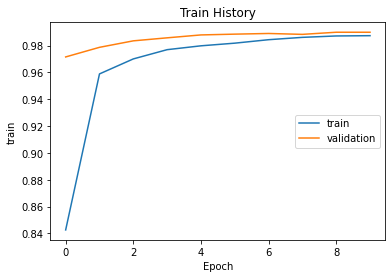

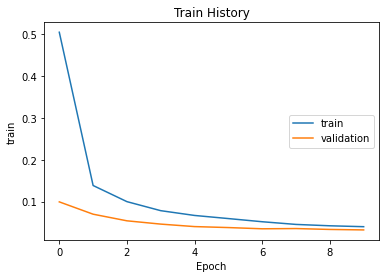

In [ ]:
import matplotlib.pyplot as plt
show_train_history(train_history, 'accuracy','val_accuracy') 
show_train_history(train_history, 'loss','val_loss')

In [ ]:
loss, accuracy = model.evaluate(x_Test4D_normalize , y_TestOneHot)
print( "\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy* 100 ))


313/313 [==============================] - 2s 4ms/step - loss: 0.0255 - accuracy: 0.9916

Loss: 0.03, Accuracy: 99.16%


In [ ]:
import pandas as pd
prediction = np.argmax(model.predict(x_Test4D_normalize), axis=1)
#prediction=model.predict_classes(x_Test4D_normalize)
pd.crosstab(y_Test,prediction,rownames=['label'],
			 colnames=['predict'])

313/313 [==============================] - 1s 2ms/step


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,0,0,0,0,0,2,1,1,0
1,0,1133,1,0,0,0,1,0,0,0
2,2,0,1027,0,0,0,0,2,1,0
3,0,0,0,1007,0,2,0,0,1,0
4,0,0,0,0,979,0,1,0,1,1
5,2,0,0,6,0,879,3,1,0,1
6,3,2,0,0,1,1,950,0,1,0
7,0,3,5,3,0,0,0,1013,1,3
8,2,0,1,1,0,1,0,2,966,1
